In [1]:
 # ----------------- WATER QUALITY ML PROJECT -----------------
# Covers: Cleaning, EDA, Feature Engineering, Splitting, Model Selection, Training, Evaluation, Hyperparameter Tuning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
import joblib
import shap

# Define RANDOM_STATE for reproducibility
RANDOM_STATE = 42

# Check if SHAP is available (optional, for explainability)
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False
    print("SHAP library not found. Install it with 'pip install shap' for explainability features.")

In [2]:
# ----------------- 1. DATA LOADING & CLEANING -----------------
# Step 1: Read CSV & skip first 2 metadata rows

# df = pd.read_csv("water.csv", skiprows=2)

df = pd.read_csv('Complete_Dataset.csv' ,encoding='latin1', skiprows=2)

In [3]:
df.head()

,4349,"SEA WATER , BAY OF BENGAL, AFTER CONFLUENCE OF MARINE OUTFALL OF M/S. AUROBINDO PHARMA LTD.\nPYDIBHEEMAVARAM (V) RANASTHALAM (M)",ANDHRA PRADESH,23,29,5,7.6,7,8.3,30900,...,1.2,2.5,BDL,1.14,3,9,64,120,Unnamed: 19,Unnamed: 20
0,4352,"SEA WAER BAY OF BENGAL, AFTER CONFLUENCE OF\nM...",ANDHRA PRADESH,24,27,4.4,8.5,7.7,8.6,33100,...,BDL,3.2,BDL,7.05,4,7,63,93,NaN,NaN
1,4357,RUSHIKONDA BEACH,ANDHRA PRADESH,24,27,4.8,7.2,7.6,8.3,32400,...,1.2,3,0.32,6.2,4,9,64,93,NaN,NaN
2,4361,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA",ANDHRA PRADESH,26,28,1.4,6.8,6.9,8.4,732,...,1.2,6.5,BDL,2.66,3,11,64,150,NaN,NaN
3,4362,"SEA WATER, BAY OF BENGAL NEAR DEEP WATER PORT,...",ANDHRA PRADESH,26,28,2,7.5,6.8,7.9,940,...,1.4,4.8,0.7,4.66,4,15,64,240,NaN,NaN
4,4363,SEA WATER BAY OF BENGAL NEAR KUMBHABHISHEKAM T...,ANDHRA PRADESH,26,28,0.8,5.6,6.6,7.9,593,...,1.6,6.4,0.97,6.24,4,15,75,210,NaN,NaN


In [4]:
print(df.shape)

(1751, 21)


In [5]:
for i in df.columns:
  print(i)

4349
SEA WATER , BAY OF BENGAL, AFTER CONFLUENCE OF MARINE OUTFALL OF M/S. AUROBINDO PHARMA LTD.
PYDIBHEEMAVARAM (V) RANASTHALAM (M)
ANDHRA PRADESH
23
29
5
7.6
7
8.3
30900
51560
1.2
2.5
BDL
1.14
3
9
64
120
Unnamed: 19
Unnamed: 20


In [6]:


# Rename columns
df.columns = [
    "Station Code", "Monitoring Location", "State",
    "Temperature (°C) Min", "Temperature (°C) Max",
    "Dissolved Oxygen (mg/L) Min", "Dissolved Oxygen (mg/L) Max",
    "pH Min", "pH Max",
    "Conductivity (µmho/cm) Min", "Conductivity (µmho/cm) Max",
    "BOD (mg/L) Min", "BOD (mg/L) Max",
    "Nitrate N (mg/L) Min", "Nitrate N (mg/L) Max",
    "Fecal Coliform (MPN/100ml) Min", "Fecal Coliform (MPN/100ml) Max",
    "Total Coliform (MPN/100ml) Min", "Total Coliform (MPN/100ml) Max",
    "Fecal Streptococci (MPN/100ml) Min", "Fecal Streptococci (MPN/100ml) Max "
]

print(df.columns)



Index(['Station Code', 'Monitoring Location', 'State', 'Temperature (°C) Min',
       'Temperature (°C) Max', 'Dissolved Oxygen (mg/L) Min',
       'Dissolved Oxygen (mg/L) Max', 'pH Min', 'pH Max',
       'Conductivity (µmho/cm) Min', 'Conductivity (µmho/cm) Max',
       'BOD (mg/L) Min', 'BOD (mg/L) Max', 'Nitrate N (mg/L) Min',
       'Nitrate N (mg/L) Max', 'Fecal Coliform (MPN/100ml) Min',
       'Fecal Coliform (MPN/100ml) Max', 'Total Coliform (MPN/100ml) Min',
       'Total Coliform (MPN/100ml) Max', 'Fecal Streptococci (MPN/100ml) Min',
       'Fecal Streptococci (MPN/100ml) Max '],
      dtype='object')


In [7]:
df.head()

,Station Code,Monitoring Location,State,Temperature (°C) Min,Temperature (°C) Max,Dissolved Oxygen (mg/L) Min,Dissolved Oxygen (mg/L) Max,pH Min,pH Max,Conductivity (µmho/cm) Min,...,BOD (mg/L) Min,BOD (mg/L) Max,Nitrate N (mg/L) Min,Nitrate N (mg/L) Max,Fecal Coliform (MPN/100ml) Min,Fecal Coliform (MPN/100ml) Max,Total Coliform (MPN/100ml) Min,Total Coliform (MPN/100ml) Max,Fecal Streptococci (MPN/100ml) Min,Fecal Streptococci (MPN/100ml) Max
0,4352,"SEA WAER BAY OF BENGAL, AFTER CONFLUENCE OF\nM...",ANDHRA PRADESH,24,27,4.4,8.5,7.7,8.6,33100,...,BDL,3.2,BDL,7.05,4,7,63,93,NaN,NaN
1,4357,RUSHIKONDA BEACH,ANDHRA PRADESH,24,27,4.8,7.2,7.6,8.3,32400,...,1.2,3,0.32,6.2,4,9,64,93,NaN,NaN
2,4361,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA",ANDHRA PRADESH,26,28,1.4,6.8,6.9,8.4,732,...,1.2,6.5,BDL,2.66,3,11,64,150,NaN,NaN
3,4362,"SEA WATER, BAY OF BENGAL NEAR DEEP WATER PORT,...",ANDHRA PRADESH,26,28,2,7.5,6.8,7.9,940,...,1.4,4.8,0.7,4.66,4,15,64,240,NaN,NaN
4,4363,SEA WATER BAY OF BENGAL NEAR KUMBHABHISHEKAM T...,ANDHRA PRADESH,26,28,0.8,5.6,6.6,7.9,593,...,1.6,6.4,0.97,6.24,4,15,75,210,NaN,NaN


In [8]:
df.shape

(1751, 21)

In [9]:
print("\n--- Missing Values ---\n")
print(df.isnull().sum())


--- Missing Values ---

Station Code                              0
Monitoring Location                       0
State                                     1
Temperature (°C) Min                    140
Temperature (°C) Max                    140
Dissolved Oxygen (mg/L) Min             121
Dissolved Oxygen (mg/L) Max             121
pH Min                                   28
pH Max                                   28
Conductivity (µmho/cm) Min              208
Conductivity (µmho/cm) Max              208
BOD (mg/L) Min                           36
BOD (mg/L) Max                           36
Nitrate N (mg/L) Min                    247
Nitrate N (mg/L) Max                    247
Fecal Coliform (MPN/100ml) Min           73
Fecal Coliform (MPN/100ml) Max           73
Total Coliform (MPN/100ml) Min          181
Total Coliform (MPN/100ml) Max          181
Fecal Streptococci (MPN/100ml) Min     1121
Fecal Streptococci (MPN/100ml) Max     1121
dtype: int64


In [10]:
print(df.dtypes)

Station Code                            int64
Monitoring Location                    object
State                                  object
Temperature (°C) Min                   object
Temperature (°C) Max                   object
Dissolved Oxygen (mg/L) Min            object
Dissolved Oxygen (mg/L) Max            object
pH Min                                 object
pH Max                                 object
Conductivity (µmho/cm) Min             object
Conductivity (µmho/cm) Max             object
BOD (mg/L) Min                         object
BOD (mg/L) Max                         object
Nitrate N (mg/L) Min                   object
Nitrate N (mg/L) Max                   object
Fecal Coliform (MPN/100ml) Min         object
Fecal Coliform (MPN/100ml) Max         object
Total Coliform (MPN/100ml) Min         object
Total Coliform (MPN/100ml) Max         object
Fecal Streptococci (MPN/100ml) Min     object
Fecal Streptococci (MPN/100ml) Max     object
dtype: object


In [11]:
print("\n--- Missing Values ---\n")
print(df.isnull().sum())


--- Missing Values ---

Station Code                              0
Monitoring Location                       0
State                                     1
Temperature (°C) Min                    140
Temperature (°C) Max                    140
Dissolved Oxygen (mg/L) Min             121
Dissolved Oxygen (mg/L) Max             121
pH Min                                   28
pH Max                                   28
Conductivity (µmho/cm) Min              208
Conductivity (µmho/cm) Max              208
BOD (mg/L) Min                           36
BOD (mg/L) Max                           36
Nitrate N (mg/L) Min                    247
Nitrate N (mg/L) Max                    247
Fecal Coliform (MPN/100ml) Min           73
Fecal Coliform (MPN/100ml) Max           73
Total Coliform (MPN/100ml) Min          181
Total Coliform (MPN/100ml) Max          181
Fecal Streptococci (MPN/100ml) Min     1121
Fecal Streptococci (MPN/100ml) Max     1121
dtype: int64


In [12]:
df.shape

(1751, 21)

In [13]:
# ----------------- 2. DATA CLEANING & FEATURE ENGINEERING -----------------

# Step 2: Convert relevant columns to numeric, coercing errors
numeric_cols = [
    "Temperature (°C) Min", "Temperature (°C) Max",
    "Dissolved Oxygen (mg/L) Min", "Dissolved Oxygen (mg/L) Max",
    "pH Min", "pH Max",
    "Conductivity (µmho/cm) Min", "Conductivity (µmho/cm) Max",
    "BOD (mg/L) Min", "BOD (mg/L) Max",
    "Nitrate N (mg/L) Min", "Nitrate N (mg/L) Max",
    "Fecal Coliform (MPN/100ml) Min", "Fecal Coliform (MPN/100ml) Max",
    "Total Coliform (MPN/100ml) Min", "Total Coliform (MPN/100ml) Max",
    "Fecal Streptococci (MPN/100ml) Min", "Fecal Streptococci (MPN/100ml) Max "
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [14]:
# Fill missing values in numeric columns using median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

df.head()


,Station Code,Monitoring Location,State,Temperature (°C) Min,Temperature (°C) Max,Dissolved Oxygen (mg/L) Min,Dissolved Oxygen (mg/L) Max,pH Min,pH Max,Conductivity (µmho/cm) Min,...,BOD (mg/L) Min,BOD (mg/L) Max,Nitrate N (mg/L) Min,Nitrate N (mg/L) Max,Fecal Coliform (MPN/100ml) Min,Fecal Coliform (MPN/100ml) Max,Total Coliform (MPN/100ml) Min,Total Coliform (MPN/100ml) Max,Fecal Streptococci (MPN/100ml) Min,Fecal Streptococci (MPN/100ml) Max
0,4352,"SEA WAER BAY OF BENGAL, AFTER CONFLUENCE OF\nM...",ANDHRA PRADESH,24.0,27.0,4.4,8.5,7.7,8.6,33100.0,...,2.0,3.2,0.33,7.05,4.0,7.0,63.0,93.0,2.0,26.0
1,4357,RUSHIKONDA BEACH,ANDHRA PRADESH,24.0,27.0,4.8,7.2,7.6,8.3,32400.0,...,1.2,3.0,0.32,6.20,4.0,9.0,64.0,93.0,2.0,26.0
2,4361,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA",ANDHRA PRADESH,26.0,28.0,1.4,6.8,6.9,8.4,732.0,...,1.2,6.5,0.33,2.66,3.0,11.0,64.0,150.0,2.0,26.0
3,4362,"SEA WATER, BAY OF BENGAL NEAR DEEP WATER PORT,...",ANDHRA PRADESH,26.0,28.0,2.0,7.5,6.8,7.9,940.0,...,1.4,4.8,0.70,4.66,4.0,15.0,64.0,240.0,2.0,26.0
4,4363,SEA WATER BAY OF BENGAL NEAR KUMBHABHISHEKAM T...,ANDHRA PRADESH,26.0,28.0,0.8,5.6,6.6,7.9,593.0,...,1.6,6.4,0.97,6.24,4.0,15.0,75.0,210.0,2.0,26.0


In [15]:

# # Drop rows with NaN in important numeric_cols
# df.dropna(subset=numeric_cols, inplace=True)

# df.head()

In [16]:
df.shape

(1751, 21)

In [17]:

# Calculate the average of min and max values for each parameter


df['Temperature (°C)'] = df[['Temperature (°C) Min', 'Temperature (°C) Max']].mean(axis=1)


df['Dissolved Oxygen (mg/L)'] = df[['Dissolved Oxygen (mg/L) Min', 'Dissolved Oxygen (mg/L) Max']].mean(axis=1)


df['pH'] = df[['pH Min', 'pH Max']].mean(axis=1)


df['Conductivity (µmho/cm)'] = df[['Conductivity (µmho/cm) Min', 'Conductivity (µmho/cm) Max']].mean(axis=1)


df['BOD (mg/L)'] = df[['BOD (mg/L) Min', 'BOD (mg/L) Max']].mean(axis=1)


df['Nitrate N (mg/L)'] = df[['Nitrate N (mg/L) Min', 'Nitrate N (mg/L) Max']].mean(axis=1)


df['Fecal Coliform (MPN/100ml)'] = df[['Fecal Coliform (MPN/100ml) Min', 'Fecal Coliform (MPN/100ml) Max']].mean(axis=1)


df['Total Coliform (MPN/100ml)'] = df[['Total Coliform (MPN/100ml) Min', 'Total Coliform (MPN/100ml) Max']].mean(axis=1)


df['Fecal Streptococci (MPN/100ml)'] = df[['Fecal Streptococci (MPN/100ml) Min', 'Fecal Streptococci (MPN/100ml) Max ']].mean(axis=1)



In [18]:

# Drop the original min and max columns

df = df.drop(columns=numeric_cols)




In [19]:

# Display the first few rows with new columns
display(df.head())


,Station Code,Monitoring Location,State,Temperature (°C),Dissolved Oxygen (mg/L),pH,Conductivity (µmho/cm),BOD (mg/L),Nitrate N (mg/L),Fecal Coliform (MPN/100ml),Total Coliform (MPN/100ml),Fecal Streptococci (MPN/100ml)
0,4352,"SEA WAER BAY OF BENGAL, AFTER CONFLUENCE OF\nM...",ANDHRA PRADESH,25.5,6.45,8.15,42900.0,2.60,3.690,5.5,78.0,14.0
1,4357,RUSHIKONDA BEACH,ANDHRA PRADESH,25.5,6.00,7.95,44850.0,2.10,3.260,6.5,78.5,14.0
2,4361,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA",ANDHRA PRADESH,27.0,4.10,7.65,29716.0,3.85,1.495,7.0,107.0,14.0
3,4362,"SEA WATER, BAY OF BENGAL NEAR DEEP WATER PORT,...",ANDHRA PRADESH,27.0,4.75,7.35,26680.0,3.10,2.680,9.5,152.0,14.0
4,4363,SEA WATER BAY OF BENGAL NEAR KUMBHABHISHEKAM T...,ANDHRA PRADESH,27.0,3.20,7.25,23696.5,4.00,3.605,9.5,142.5,14.0


In [20]:
df.columns

Index(['Station Code', 'Monitoring Location', 'State', 'Temperature (°C)',
       'Dissolved Oxygen (mg/L)', 'pH', 'Conductivity (µmho/cm)', 'BOD (mg/L)',
       'Nitrate N (mg/L)', 'Fecal Coliform (MPN/100ml)',
       'Total Coliform (MPN/100ml)', 'Fecal Streptococci (MPN/100ml)'],
      dtype='object')

In [21]:
# Clean column names (remove any extra spaces)
df.columns = df.columns.str.strip()

# Correct list of columns to drop
other_col = [
    "Fecal Streptococci (MPN/100ml)"
]

# Drop those columns
df = df.drop(columns=other_col)

In [22]:
df.head()

,Station Code,Monitoring Location,State,Temperature (°C),Dissolved Oxygen (mg/L),pH,Conductivity (µmho/cm),BOD (mg/L),Nitrate N (mg/L),Fecal Coliform (MPN/100ml),Total Coliform (MPN/100ml)
0,4352,"SEA WAER BAY OF BENGAL, AFTER CONFLUENCE OF\nM...",ANDHRA PRADESH,25.5,6.45,8.15,42900.0,2.60,3.690,5.5,78.0
1,4357,RUSHIKONDA BEACH,ANDHRA PRADESH,25.5,6.00,7.95,44850.0,2.10,3.260,6.5,78.5
2,4361,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA",ANDHRA PRADESH,27.0,4.10,7.65,29716.0,3.85,1.495,7.0,107.0
3,4362,"SEA WATER, BAY OF BENGAL NEAR DEEP WATER PORT,...",ANDHRA PRADESH,27.0,4.75,7.35,26680.0,3.10,2.680,9.5,152.0
4,4363,SEA WATER BAY OF BENGAL NEAR KUMBHABHISHEKAM T...,ANDHRA PRADESH,27.0,3.20,7.25,23696.5,4.00,3.605,9.5,142.5


In [24]:

# Display the data types to confirm conversion
print("\n--- Data Types After Conversion and Averaging ---\n")
print(df.dtypes)


--- Data Types After Conversion and Averaging ---

Station Code                    int64
Monitoring Location            object
State                          object
Temperature (°C)              float64
Dissolved Oxygen (mg/L)       float64
pH                            float64
Conductivity (µmho/cm)        float64
BOD (mg/L)                    float64
Nitrate N (mg/L)              float64
Fecal Coliform (MPN/100ml)    float64
Total Coliform (MPN/100ml)    float64
dtype: object


In [25]:
# ----------------- 3. FEATURE ENGINEERING -----------------
# Create pollution status label - UPDATED THRESHOLDS

def pollution_status(row):
    """
    Updated rule-based labeling using conservative/standard thresholds:
    - Clean   : near-drinking quality (strict)
    - Moderate: suitable for bathing/irrigation (CPCB recreational-like limits)
    - Polluted: otherwise or when values missing/invalid
    Notes:
    - 'Nitrate N (mg/L)' assumed to be nitrate expressed as nitrogen (NO3-N).
    - If your nitrate column is NO3 (not N), convert/adjust accordingly.
    """
    try:
        # CLEAN: strict (near potable/drinking quality)
        if (
            # temperature: cooler water is healthier; strict threshold
            row['Temperature (°C)'] <= 25 and

            # dissolved oxygen: good water usually >=6 mg/L
            row['Dissolved Oxygen (mg/L)'] >= 6 and

            # pH: WHO / BIS recommended drinking range ~6.5-8.5
            6.5 <= row['pH'] <= 8.5 and

            # conductivity: conservative for potable surface/ground water (µmho/cm)
            row['Conductivity (µmho/cm)'] <= 500 and

            # BOD: low BOD indicates little organic pollution
            row['BOD (mg/L)'] <= 3 and

            # Nitrate as N: conservative limit ~10 mg/L (if column is NO3, adjust)
            row['Nitrate N (mg/L)'] <= 10 and

            # Microbial: for safe drinking ideally 0 MPN/100ml (or non-detect)
            row['Fecal Coliform (MPN/100ml)'] <= 0 and
            row['Total Coliform (MPN/100ml)'] <= 0
        ):
            return 'Clean'

        # MODERATE: acceptable for bathing/irrigation/recreation (less strict)
        elif (
            row['Temperature (°C)'] <= 35 and
            row['Dissolved Oxygen (mg/L)'] >= 5 and  # bathing guideline often uses >=5
            6.0 <= row['pH'] <= 9.0 and
            row['Conductivity (µmho/cm)'] <= 3000 and
            row['BOD (mg/L)'] <= 5 and
            # keep a higher nitrate cap for non-potable uses (matches some WQIs)
            row['Nitrate N (mg/L)'] <= 45 and
            # CPCB recreational (organized bathing) uses fecal coliform <= 500 (desirable)
            # some CPCB docs allow up to 2500 for certain outdoor bathing criteria;
            # here we pick a moderate threshold (<=2500) to match earlier logic,
            # but users can tighten to <=500 if they want stricter "Moderate".
            row['Fecal Coliform (MPN/100ml)'] <= 2500 and
            row['Total Coliform (MPN/100ml)'] <= 500
        ):
            return 'Moderate'

        # POLLUTED: otherwise
        else:
            return 'Polluted'

    except Exception:
        # Fallback for NaNs or missing values
        return 'Polluted'


In [26]:

# Apply to entire DataFrame
df['pollution_status'] = df.apply(pollution_status, axis=1)


df['pollution_status'].value_counts()


,count
pollution_status,
Polluted,1551
Moderate,200


In [27]:
df.head()

,Station Code,Monitoring Location,State,Temperature (°C),Dissolved Oxygen (mg/L),pH,Conductivity (µmho/cm),BOD (mg/L),Nitrate N (mg/L),Fecal Coliform (MPN/100ml),Total Coliform (MPN/100ml),pollution_status
0,4352,"SEA WAER BAY OF BENGAL, AFTER CONFLUENCE OF\nM...",ANDHRA PRADESH,25.5,6.45,8.15,42900.0,2.60,3.690,5.5,78.0,Polluted
1,4357,RUSHIKONDA BEACH,ANDHRA PRADESH,25.5,6.00,7.95,44850.0,2.10,3.260,6.5,78.5,Polluted
2,4361,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA",ANDHRA PRADESH,27.0,4.10,7.65,29716.0,3.85,1.495,7.0,107.0,Polluted
3,4362,"SEA WATER, BAY OF BENGAL NEAR DEEP WATER PORT,...",ANDHRA PRADESH,27.0,4.75,7.35,26680.0,3.10,2.680,9.5,152.0,Polluted
4,4363,SEA WATER BAY OF BENGAL NEAR KUMBHABHISHEKAM T...,ANDHRA PRADESH,27.0,3.20,7.25,23696.5,4.00,3.605,9.5,142.5,Polluted


In [28]:
# Encode labels for ML
le = LabelEncoder()
df['pollution_label'] = le.fit_transform(df['pollution_status'])

df.head()

,Station Code,Monitoring Location,State,Temperature (°C),Dissolved Oxygen (mg/L),pH,Conductivity (µmho/cm),BOD (mg/L),Nitrate N (mg/L),Fecal Coliform (MPN/100ml),Total Coliform (MPN/100ml),pollution_status,pollution_label
0,4352,"SEA WAER BAY OF BENGAL, AFTER CONFLUENCE OF\nM...",ANDHRA PRADESH,25.5,6.45,8.15,42900.0,2.60,3.690,5.5,78.0,Polluted,1
1,4357,RUSHIKONDA BEACH,ANDHRA PRADESH,25.5,6.00,7.95,44850.0,2.10,3.260,6.5,78.5,Polluted,1
2,4361,"SEA WATER BAY BENGAL, UPPADA BEACH ROAD, KAKINADA",ANDHRA PRADESH,27.0,4.10,7.65,29716.0,3.85,1.495,7.0,107.0,Polluted,1
3,4362,"SEA WATER, BAY OF BENGAL NEAR DEEP WATER PORT,...",ANDHRA PRADESH,27.0,4.75,7.35,26680.0,3.10,2.680,9.5,152.0,Polluted,1
4,4363,SEA WATER BAY OF BENGAL NEAR KUMBHABHISHEKAM T...,ANDHRA PRADESH,27.0,3.20,7.25,23696.5,4.00,3.605,9.5,142.5,Polluted,1


In [29]:
# ----------------- 3) QUICK EDA (prints & optional plots) -----------------
print("\nDataset shape:", df.shape)

print("\n --------Label distribution (counts)-----------\n")

print(df['pollution_status'].value_counts())


Dataset shape: (1751, 13)

 --------Label distribution (counts)-----------

pollution_status
Polluted    1551
Moderate     200
Name: count, dtype: int64


In [30]:
# ----------------- 4) SPLIT & K-FOLD (Stratified) -----------------
important_cols = [
    'Temperature (°C)',
    'Dissolved Oxygen (mg/L)',
    'pH',
    'Conductivity (µmho/cm)',
    'BOD (mg/L)',
    'Nitrate N (mg/L)',
    'Fecal Coliform (MPN/100ml)',
    'Total Coliform (MPN/100ml)'
]

X = df[important_cols].copy()
y = df['pollution_label']

In [31]:
X.head()

,Temperature (°C),Dissolved Oxygen (mg/L),pH,Conductivity (µmho/cm),BOD (mg/L),Nitrate N (mg/L),Fecal Coliform (MPN/100ml),Total Coliform (MPN/100ml)
0,25.5,6.45,8.15,42900.0,2.60,3.690,5.5,78.0
1,25.5,6.00,7.95,44850.0,2.10,3.260,6.5,78.5
2,27.0,4.10,7.65,29716.0,3.85,1.495,7.0,107.0
3,27.0,4.75,7.35,26680.0,3.10,2.680,9.5,152.0
4,27.0,3.20,7.25,23696.5,4.00,3.605,9.5,142.5


In [32]:
y.head()

,pollution_label
0,1
1,1
2,1
3,1
4,1


In [33]:
# Use stratified split to preserve label distribution in train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)


In [34]:

# Setup Stratified K-Fold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


In [35]:

# ----------------- 5) HYPERPARAMETER TUNING (GridSearchCV for RF and XGB) -----------------
# Small parameter grids to keep runtime reasonable; you can expand later
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 8, 12],
    'min_samples_split': [2, 5]
}

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

print("\nStarting GridSearchCV for RandomForest (this may take a bit)...")
rf_gs = GridSearchCV(
    estimator=RandomForestClassifier(random_state=RANDOM_STATE),
    param_grid=rf_param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
rf_gs.fit(X_train, y_train)
print("Best RF params:", rf_gs.best_params_)
print("Best RF CV score:", rf_gs.best_score_)

print("\nStarting GridSearchCV for XGBoost (this may take a bit)...")
xgb_gs = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=RANDOM_STATE),
    param_grid=xgb_param_grid,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)
xgb_gs.fit(X_train, y_train)
print("Best XGB params:", xgb_gs.best_params_)
print("Best XGB CV score:", xgb_gs.best_score_)



Starting GridSearchCV for RandomForest (this may take a bit)...
Best RF params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best RF CV score: 0.985

Starting GridSearchCV for XGBoost (this may take a bit)...
Best XGB params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}
Best XGB CV score: 0.9957142857142858


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:18:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [36]:

# Use the best estimators found
best_rf = rf_gs.best_estimator_
best_xgb = xgb_gs.best_estimator_


# print(best_rf)
# print(best_xgb)


In [37]:

# ----------------- 6) RANDOM FOREST (interpretable model) -----------------
print("\nTraining final RandomForest (best params)...")
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)
print("\n--- RandomForest Evaluation ---")
print("Accuracy (RF):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))




Training final RandomForest (best params)...

--- RandomForest Evaluation ---
Accuracy (RF): 0.9857549857549858
              precision    recall  f1-score   support

    Moderate       0.95      0.93      0.94        40
    Polluted       0.99      0.99      0.99       311

    accuracy                           0.99       351
   macro avg       0.97      0.96      0.96       351
weighted avg       0.99      0.99      0.99       351



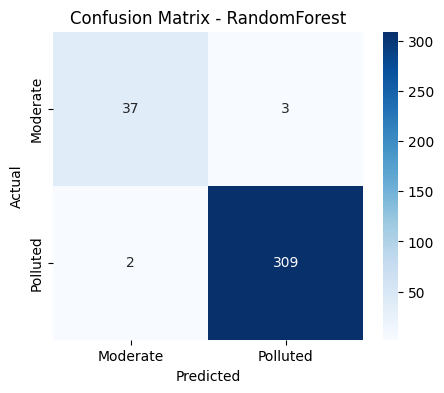

In [38]:
# Confusion matrix plot for RF
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - RandomForest")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()



RandomForest feature importances (descending):
Total Coliform (MPN/100ml)    0.290760
Conductivity (µmho/cm)        0.213320
BOD (mg/L)                    0.118347
Fecal Coliform (MPN/100ml)    0.105605
pH                            0.087314
Dissolved Oxygen (mg/L)       0.082174
Temperature (°C)              0.068998
Nitrate N (mg/L)              0.033481
dtype: float64


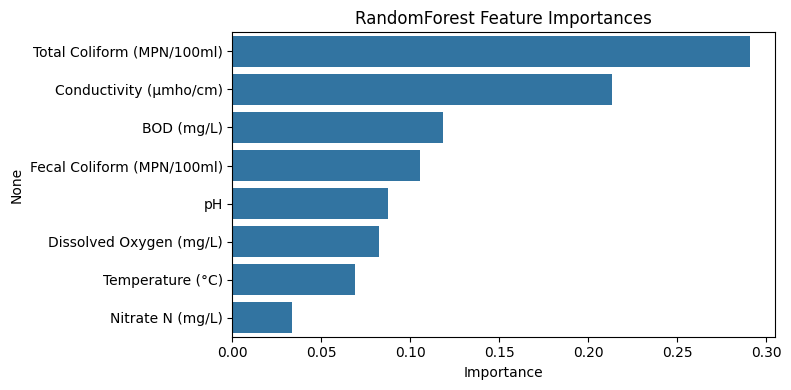

In [39]:

# Feature importances from RF (simple interpretation)
rf_importances = pd.Series(best_rf.feature_importances_, index=important_cols).sort_values(ascending=False)
print("\nRandomForest feature importances (descending):")
print(rf_importances)

plt.figure(figsize=(8,4))
sns.barplot(x=rf_importances.values, y=rf_importances.index)
plt.title("RandomForest Feature Importances"); plt.xlabel("Importance"); plt.tight_layout(); plt.show()



Calculating SHAP explanations for RandomForest (can take some time)...


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:254: FutureWarning: In the future, passing feature_perturbation='interventional' without providing a background dataset will raise an error. Please provide a background dataset to continue using the interventional approach or set feature_perturbation='auto' to automatically switch approaches.
  warnings.warn(


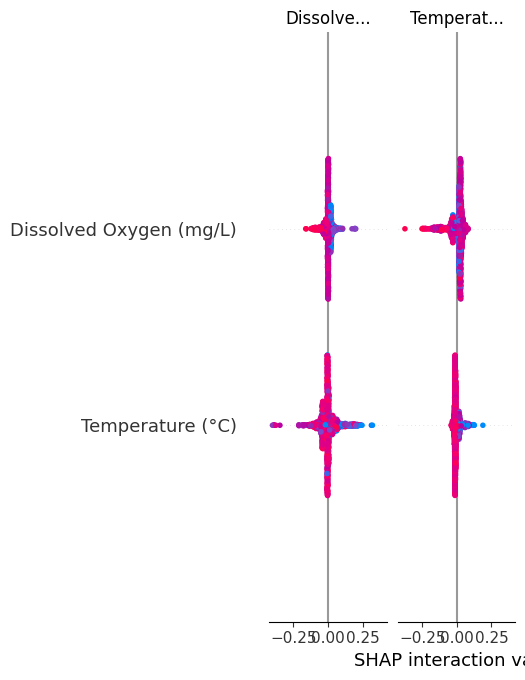

In [40]:

# ----------------- 7) SHAP EXPLAINABILITY (for RandomForest) -----------------
if SHAP_AVAILABLE:
    print("\nCalculating SHAP explanations for RandomForest (can take some time)...")
    # use TreeExplainer for tree-based models - fast and exact-ish
    explainer = shap.TreeExplainer(best_rf, feature_perturbation="interventional")
    shap_values = explainer.shap_values(X_train)  # list per class for multiclass
    # For multiclass, shap_values is a list of arrays; use summary for each or sum absolute
    # We'll show a global summary for class with highest support (or average importance)
    try:
        # summary plot (absolute importance aggregated across classes)
        shap.summary_plot(shap_values, X_train, show=True)
    except Exception as e:
        print("SHAP plotting raised an exception:", e)
else:
    print("\nSHAP not available: install shap (pip install shap) to get explainability visuals.")



Training Stacking Classifier (this may take time)...

--- Stacking Classifier Evaluation ---
Accuracy (Stacking): 0.9943019943019943
              precision    recall  f1-score   support

    Moderate       1.00      0.95      0.97        40
    Polluted       0.99      1.00      1.00       311

    accuracy                           0.99       351
   macro avg       1.00      0.97      0.99       351
weighted avg       0.99      0.99      0.99       351



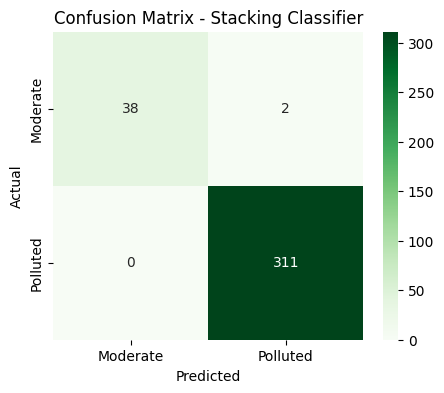

In [41]:

# ----------------- 8) STACKING CLASSIFIER (best-performance ensemble) -----------------
# Base models - use tuned RF and tuned XGB, plus an SVM (we leave SVM with default-ish params; can be tuned too)
base_models = [
    ('rf', best_rf),
    ('xgb', best_xgb),
    ('svm', SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=RANDOM_STATE))
]

meta_model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=skf,
    stack_method='predict_proba',
    n_jobs=-1,
    passthrough=False
)

print("\nTraining Stacking Classifier (this may take time)...")
stacking_clf.fit(X_train, y_train)

y_pred_stack = stacking_clf.predict(X_test)
print("\n--- Stacking Classifier Evaluation ---")
print("Accuracy (Stacking):", accuracy_score(y_test, y_pred_stack))
print(classification_report(y_test, y_pred_stack, target_names=le.classes_))

# Confusion matrix plot for Stacking
cm_stack = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(5,4))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Greens', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix - Stacking Classifier")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.show()


In [42]:
# ----------------- 9) Compare & Save Best Model -----------------
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f"\nOverall accuracy on test set:")
print(f"RandomForest accuracy: {acc_rf:.4f}")
print(f"Stacking accuracy: {acc_stack:.4f}")


if acc_stack >= acc_rf:
    best_model = stacking_clf
    best_name = "Stacking"
else:
    best_model = best_rf
    best_name = "RandomForest"

print(f"Selected best model: {best_name}")

#  save the best model to disk for later use
joblib.dump(best_model, "best_water_model.pkl")
joblib.dump(le, "label_encoder.pkl")


Overall accuracy on test set:
RandomForest accuracy: 0.9858
Stacking accuracy: 0.9943
Selected best model: Stacking


['label_encoder.pkl']

In [43]:
# ----------------- Evaluate Base Models Before Stacking -----------------       $$$$$ ADDTIONAL %%%%%

base_model_results = []

# Evaluate Random Forest
y_train_pred_rf = best_rf.predict(X_train)
y_test_pred_rf = best_rf.predict(X_test)
train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
base_model_results.append({'Model': 'RandomForest', 'Train_Accuracy': train_acc_rf, 'Test_Accuracy': test_acc_rf})

# Evaluate XGBoost
y_train_pred_xgb = best_xgb.predict(X_train)
y_test_pred_xgb = best_xgb.predict(X_test)
train_acc_xgb = accuracy_score(y_train, y_train_pred_xgb)
test_acc_xgb = accuracy_score(y_test, y_test_pred_xgb)
base_model_results.append({'Model': 'XGBoost', 'Train_Accuracy': train_acc_xgb, 'Test_Accuracy': test_acc_xgb})

# Evaluate SVM
# Need to fit the SVM model separately as it wasn't explicitly fitted before stacking
svm_model = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=RANDOM_STATE)
svm_model.fit(X_train, y_train)
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)
train_acc_svm = accuracy_score(y_train, y_train_pred_svm)
test_acc_svm = accuracy_score(y_test, y_test_pred_svm)
base_model_results.append({'Model': 'SVM', 'Train_Accuracy': train_acc_svm, 'Test_Accuracy': test_acc_svm})


# Create DataFrame and display
base_model_df = pd.DataFrame(base_model_results)
display(base_model_df)

,Model,Train_Accuracy,Test_Accuracy
0,RandomForest,1.000000,0.985755
1,XGBoost,0.999286,0.994302
2,SVM,0.885714,0.886040


In [44]:
# ----------------- 10) FINAL USER INPUT PREDICTION & EXPLANATION -----------------
print("\n----------- Enter water quality values for ML prediction -------------\n")
global user_df

try:
    temp = float(input("Temperature (°C): "))
    do = float(input("Dissolved Oxygen (mg/L): "))
    ph = float(input("pH: "))
    cond = float(input("Conductivity (µmho/cm): "))
    bod = float(input("BOD (mg/L): "))
    nitrate = float(input("Nitrate N (mg/L): "))
    fecal = float(input("Fecal Coliform (MPN/100ml): "))
    total = float(input("Total Coliform (MPN/100ml): "))

    user_df = pd.DataFrame([{
        "Temperature (°C)": temp,
        "Dissolved Oxygen (mg/L)": do,
        "pH": ph,
        "Conductivity (µmho/cm)": cond,
        "BOD (mg/L)": bod,
        "Nitrate N (mg/L)": nitrate,
        "Fecal Coliform (MPN/100ml)": fecal,
        "Total Coliform (MPN/100ml)": total
    }])[important_cols]  # ensure column order

    pred_label = best_model.predict(user_df)
    predicted_status = le.inverse_transform(pred_label)[0]
    print(f"\n💧 ML Predicted Pollution Status: {predicted_status}")

except ValueError:
    print("Invalid input — please enter numeric values only.")

# user_df will be available in the next cell2


----------- Enter water quality values for ML prediction -------------

Temperature (°C): 28
Dissolved Oxygen (mg/L): 7
pH: 9
Conductivity (µmho/cm): 120
BOD (mg/L): 40
Nitrate N (mg/L): 45
Fecal Coliform (MPN/100ml): 150
Total Coliform (MPN/100ml): 120

💧 ML Predicted Pollution Status: Polluted


In [ ]:

# Test Case 1: Clean Water
# Input Values:
# Temperature (°C): 20.0
# Dissolved Oxygen (mg/L): 7.0
# pH: 7.0
# Conductivity (µmho/cm): 500.0
# BOD (mg/L): 1.0
# Nitrate N (mg/L): 2.0
# Fecal Coliform (MPN/100ml): 10.0
# Total Coliform (MPN/100ml): 20.0
# Expected Status (based on rules): Clean

# Test Case 2: Moderate Water
# Input Values:
# Temperature (°C): 30.0
# Dissolved Oxygen (mg/L): 5.0
# pH: 8.0
# Conductivity (µmho/cm): 2000.0
# BOD (mg/L): 4.0
# Nitrate N (mg/L): 15.0
# Fecal Coliform (MPN/100ml): 1000.0
# Total Coliform (MPN/100ml): 300.0
# Expected Status (based on rules): Moderate

# Test Case 3: Polluted Water
# Input Values:
# Temperature (°C): 38.0
# Dissolved Oxygen (mg/L): 3.0
# pH: 9.5
# Conductivity (µmho/cm): 4000.0
# BOD (mg/L): 10.0
# Nitrate N (mg/L): 50.0
# Fecal Coliform (MPN/100ml): 3000.0
# Total Coliform (MPN/100ml): 600.0
# Expected Status (based on rules): Polluted